In [106]:
import pickle
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
style.use('ggplot')


In [2]:
with open('EHR_df', 'rb') as f:
    EHR_df_cleaned = pickle.load(f)

## Feature Engineering

In [3]:
EHR_df_cleaned.head()

,SUBJECT_ID,HADM_ID,CATEGORY,TEXT,ICD9_CODE,LONG_TITLE
0,22532,167853,Discharge summary,Admission Date: Discharge Date: ...,01193,"Pulmonary tuberculosis, unspecified, tubercle ..."
1,22532,167853,Discharge summary,Admission Date: Discharge Date: ...,01193,"Pulmonary tuberculosis, unspecified, tubercle ..."
2,13702,196489,Discharge summary,Admission Date: Discharge Date...,51884,Acute and chronic respiratory failure
3,26880,135453,Discharge summary,Admission Date: Discharge Date...,80506,Closed fracture of sixth cervical vertebra
4,53181,170490,Discharge summary,Admission Date: Discharge Date...,2252,Benign neoplasm of cerebral meninges


Creating the following features from TEXT column of the dataframe:

1) Social History

2) Medical History

3) Family History

In [4]:
#Making all the TEXT lower case
EHR_df_cleaned.TEXT = EHR_df_cleaned.TEXT.str.lower()

In [5]:
#Creating history features that represent a patients EHR
EHR_df_cleaned['MEDICAL_HISTORY'] = EHR_df_cleaned.TEXT.apply(lambda x: x[x.find('past medical history'):x.find('social history')])
EHR_df_cleaned['SOCIAL_HISTORY'] = EHR_df_cleaned.TEXT.apply(lambda x: x[x.find('social history'):x.find('family history')])
EHR_df_cleaned['FAMILY_HISTORY'] = EHR_df_cleaned.TEXT.apply(lambda x: x[x.find('family history'):x.find('physical exam')])


In [6]:
EHR_df_cleaned.head()

,SUBJECT_ID,HADM_ID,CATEGORY,TEXT,ICD9_CODE,LONG_TITLE,MEDICAL_HISTORY,SOCIAL_HISTORY,FAMILY_HISTORY
0,22532,167853,Discharge summary,admission date: discharge date: ...,01193,"Pulmonary tuberculosis, unspecified, tubercle ...",past medical history abdominal ct: abdomina...,,
1,22532,167853,Discharge summary,admission date: discharge date: ...,01193,"Pulmonary tuberculosis, unspecified, tubercle ...",past medical history: cardiomyopathy idiopat...,social history: the patient is an african ame...,family history: there is a family history of ...
2,13702,196489,Discharge summary,admission date: discharge date...,51884,Acute and chronic respiratory failure,past medical history: copd flare fev1 40 in...,social history: the patient is married and wor...,family history: fhx cad father with an mi i...
3,26880,135453,Discharge summary,admission date: discharge date...,80506,Closed fracture of sixth cervical vertebra,past medical history: coronary artery disease ...,social history: patient recently discharged fr...,family history: non contributory
4,53181,170490,Discharge summary,admission date: discharge date...,2252,Benign neoplasm of cerebral meninges,"past medical history, past surgical history, f...",social history to the initial note on she ...,"family history: cancer, diabetes, hearing loss..."


In [7]:
print('# of empty entries from Social History is {}'.format((EHR_df_cleaned['SOCIAL_HISTORY'] == '').sum()))
print('# of empty entries from Family History is {}'.format((EHR_df_cleaned['FAMILY_HISTORY'] == '').sum()))
print('# of empty entries from Social History is {}'.format((EHR_df_cleaned['MEDICAL_HISTORY'] == '').sum()))

# of empty entries from Social History is 16119
# of empty entries from Family History is 18473
# of empty entries from Social History is 10380


In [8]:
#Want to get rid of the rows that have ALL missing entries from social, family, and medical history

EHR_df = EHR_df_cleaned[(EHR_df_cleaned['SOCIAL_HISTORY']!='') & (EHR_df_cleaned['FAMILY_HISTORY'] != '') & (EHR_df_cleaned['MEDICAL_HISTORY'] != '')]

In [9]:
EHR_df.shape

(38122, 9)

In [10]:
#Removing all the column titles off the history entries
EHR_df.MEDICAL_HISTORY = EHR_df.MEDICAL_HISTORY.str.replace('past medical history', ' ')
EHR_df.SOCIAL_HISTORY = EHR_df.SOCIAL_HISTORY.str.replace('social history', ' ')
EHR_df.FAMILY_HISTORY = EHR_df.FAMILY_HISTORY.str.replace('family history', ' ')

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Now we could combine all the social, family, and medical history into one history info table

In [11]:
EHR_df['HISTORY_INFO'] = EHR_df['MEDICAL_HISTORY'] + EHR_df['SOCIAL_HISTORY'] + EHR_df['FAMILY_HISTORY']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
EHR_df.head()

,SUBJECT_ID,HADM_ID,CATEGORY,TEXT,ICD9_CODE,LONG_TITLE,MEDICAL_HISTORY,SOCIAL_HISTORY,FAMILY_HISTORY,HISTORY_INFO
1,22532,167853,Discharge summary,admission date: discharge date: ...,01193,"Pulmonary tuberculosis, unspecified, tubercle ...",": cardiomyopathy idiopathic, echocardiogram...",: the patient is an african american female ...,: there is a of colon cancer,": cardiomyopathy idiopathic, echocardiogram..."
2,13702,196489,Discharge summary,admission date: discharge date...,51884,Acute and chronic respiratory failure,": copd flare fev1 40 in , on 5l oxygen, s...",: the patient is married and worked as a clin...,": fhx cad father with an mi in his 40 s, d...",": copd flare fev1 40 in , on 5l oxygen, s..."
3,26880,135453,Discharge summary,admission date: discharge date...,80506,Closed fracture of sixth cervical vertebra,: coronary artery disease s p cabg chf htn ai...,: patient recently discharged from for seve...,: non contributory,: coronary artery disease s p cabg chf htn ai...
4,53181,170490,Discharge summary,admission date: discharge date...,2252,Benign neoplasm of cerebral meninges,", past surgical history, facial history, and",to the initial note on she cam to the bt...,": cancer, diabetes, hearing loss, and heart d...",", past surgical history, facial history, and ..."
5,20646,134727,Discharge summary,admission date: discharge date...,51881,Acute respiratory failure,: cad s p stent in chf htn pe pancreati...,: the patient has been in rehab for the past ...,: doesn t know about siblings health childre...,: cad s p stent in chf htn pe pancreati...


Now we need to create the target variable, 'stroke' or 'non-nonstroke'. This is determined by extracting the first three values of the ICD9 codes.

In [17]:
#Reducing the ICD9_CODE to the first 3 digits
EHR_df.ICD9_CODE = EHR_df.ICD9_CODE.apply(lambda x: x[:3])

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [37]:
#stroke labels were recieved from ...
def stroke_labeler(x):
    stroke_labels = ['430', '431', '434', '436', '463']
    if x in stroke_labels:
        return 'stroke'
    else:
        return 'non-stroke'

In [35]:
EHR_df['stroke_label'] = EHR_df.ICD9_CODE.apply(lambda x:stroke_labeler(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Exploratory Data Analysis

Identifying the number of records in stroke and non-stroke group

Text(0.5,1,'Normalized Stroke Count')

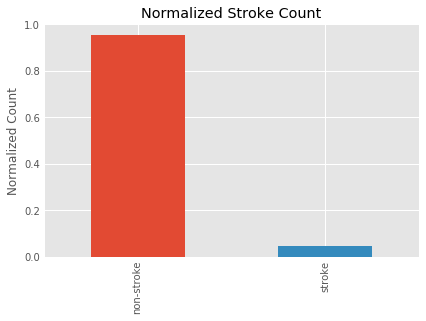

In [102]:
EHR_df.stroke_label.value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Normalized Count')
plt.title('Normalized Stroke Count')

In [88]:
EHR_df.stroke_label.value_counts(ascending=False)

non-stroke    36417
stroke         1705
Name: stroke_label, dtype: int64

In [89]:
print('The percentage of stroke records in the dataset are {} %'.format(np.round(1705/36417*100,2)))

The percentage of stroke records in the dataset are 4.68 %


Listing the top 10 

<function matplotlib.pyplot.xticks>

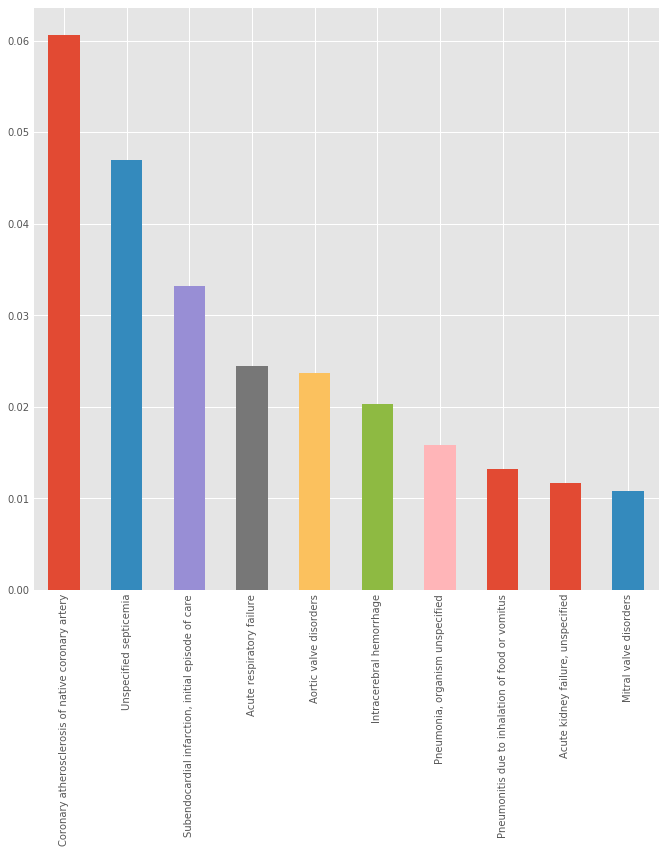

In [110]:
plt.figure(figsize=(10,10))
EHR_df.LONG_TITLE.value_counts(normalize=True)[:10].plot(kind='bar')
plt.xticks

In [111]:
print('The top diagnosis is coronary atherosclerosis, which means that this is high prevalance')

The top diagnosis is coronary atherosclerosis, which means that this is high prevalance


We will be doing more feature engineering using NLP techniques like tfidf, count vec, and w2v. This will be done in the next notebook.

## Saving pickle from this notebook

In [1]:
with open('EHR_df_part2', 'wb') as f: #change
    pickle.dump(EHR_df, f)         #change 

NameError: name 'pickle' is not defined